In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
data_dir = os.path.join('.', 'data')

In [3]:
def remove_parens(x):
    return x[1:-1]

In [4]:
def load_data(filename):
    return pd.read_csv(os.path.join(data_dir, filename))

In [5]:
drive = load_data('drive.csv')
drive = drive.loc[drive.start_field.notna() & drive.start_field.notnull()]
drive.start_field = drive.start_field.astype(str).apply(remove_parens).astype(int)
drive.end_field = drive.end_field.astype(str).apply(remove_parens).astype(int)
drive['ended_in_opposing_territory'] = drive.end_field > 0
drive.head()

,gsis_id,drive_id,start_field,start_time,end_field,end_time,pos_team,pos_time,first_downs,result,penalty_yards,yards_gained,play_count,time_inserted,time_updated,ended_in_opposing_territory
0,2009081350,1,-30,"(Q1,0)",-11,"(Q1,239)",PIT,(239),1,Punt,4,15,6,2013-09-04 01:36:23.420121-04,2013-09-04 01:36:23.420121-04,False
1,2009081350,2,-35,"(Q1,239)",7,"(Q1,526)",ARI,(287),3,Punt,0,42,10,2013-09-04 01:36:23.420121-04,2013-09-04 01:36:23.420121-04,True
2,2009081350,3,-42,"(Q1,526)",-14,"(Q1,870)",PIT,(344),2,Punt,-5,33,8,2013-09-04 01:36:23.420121-04,2013-09-04 01:36:23.420121-04,False
3,2009081350,4,-29,"(Q1,870)",11,"(Q2,244)",ARI,(274),3,Punt,0,40,10,2013-09-04 01:36:23.420121-04,2013-09-04 01:36:23.420121-04,True
4,2009081350,5,-39,"(Q2,244)",18,"(Q2,437)",PIT,(193),1,Field Goal,-5,62,6,2013-09-04 01:36:23.420121-04,2013-09-04 01:36:23.420121-04,True


In [6]:
game = load_data('game.csv')
game['away_win'] = game.away_score > game.home_score
game['home_win'] = game.home_score > game.away_score
game['turnover_differential'] = game.home_turnovers - game.away_turnovers
game.head()

,gsis_id,gamekey,start_time,week,day_of_week,season_year,season_type,finished,home_team,home_score,...,away_score_q2,away_score_q3,away_score_q4,away_score_q5,away_turnovers,time_inserted,time_updated,away_win,home_win,turnover_differential
0,2014122106,56403,2014-12-21 13:00:00-05,16,Sunday,2014,Regular,t,PIT,20,...,3,0,6,0,0,2014-07-24 17:32:41.702371-04,2014-12-24 02:59:45.135816-05,False,True,0
1,2015102500,56595,2015-10-25 09:30:00-04,7,Sunday,2015,Regular,t,JAC,34,...,10,0,18,0,0,2015-10-25 19:28:34.570797-04,2015-10-28 02:59:49.506824-04,False,True,1
2,2014122107,56404,2014-12-21 13:00:00-05,16,Sunday,2014,Regular,t,TB,3,...,3,0,10,0,2,2014-07-24 17:32:41.702371-04,2014-12-24 02:59:45.135816-05,True,False,0
3,2014122108,56405,2014-12-21 16:05:00-05,16,Sunday,2014,Regular,t,STL,27,...,10,14,3,0,1,2014-07-24 17:32:41.702371-04,2014-12-24 02:59:45.135816-05,True,False,-1
4,2014122109,56406,2014-12-21 16:25:00-05,16,Sunday,2014,Regular,t,DAL,42,...,0,0,7,0,2,2014-07-24 17:32:41.702371-04,2014-12-24 02:59:45.135816-05,False,True,1


In [7]:
agg_play = load_data('agg_play.csv')
agg_play = agg_play.set_index(['gsis_id', 'play_id'])
agg_play.head()

,,drive_id,defense_ast,defense_ffum,defense_fgblk,defense_frec,defense_frec_tds,defense_frec_yds,defense_int,defense_int_tds,defense_int_yds,...,receiving_yac_yds,receiving_yds,rushing_att,rushing_loss,rushing_loss_yds,rushing_tds,rushing_twopta,rushing_twoptm,rushing_twoptmissed,rushing_yds
gsis_id,play_id,,,,,,,,,,,,,,,,,,,,,
2015092707,36,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015092703,36,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015092800,4074,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015092708,36,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015091000,836,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
game_drive = game.merge(drive, left_on=['gsis_id', 'home_team'], right_on=['gsis_id', 'pos_team'])

grouped_game_drive = game_drive.groupby(['gsis_id', 'home_team'])
week = grouped_game_drive['week'].first()
season_year = grouped_game_drive['season_year'].first()
mean_start_field = grouped_game_drive['start_field'].mean()
penalty_yards = grouped_game_drive['penalty_yards'].sum()
turnover_differential = grouped_game_drive['turnover_differential'].first()
yards_gained = grouped_game_drive['yards_gained'].sum()
home_win = grouped_game_drive['home_win'].first()
day_of_week = grouped_game_drive['day_of_week'].first()

numeric_days = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

agg_game_drive = pd.concat([season_year, week, day_of_week, mean_start_field, penalty_yards, yards_gained, turnover_differential, home_win], axis=1)
agg_game_drive.home_win = agg_game_drive.home_win.astype(int)
agg_game_drive.day_of_week = agg_game_drive.day_of_week.apply(lambda x: numeric_days[x])
agg_game_drive.head()

,,season_year,week,day_of_week,start_field,penalty_yards,yards_gained,turnover_differential,home_win
gsis_id,home_team,,,,,,,,
2009080950,TEN,2009,0,6,-23.166667,-62,271,2,1
2009081350,PIT,2009,1,3,-19.636364,-21,280,2,1
2009081351,PHI,2009,1,3,-19.545455,2,420,-1,0
2009081352,BAL,2009,1,3,-18.916667,-50,500,0,1
2009081353,OAK,2009,1,3,-20.333333,14,456,2,1


In [9]:
def two_component_pca(features):
    pca = PCA(n_components=2)
    fitted = pca.fit(features)
    principal_components = fitted.transform(features)
    print(features.shape)
    print(principal_components.shape)
    explained_variance_ratio = fitted.explained_variance_ratio_
    return principal_components, explained_variance_ratio

In [10]:
def df_pca(df, feature_names, label_name, title=None):
    if title is None:
        title = ', '.join(feature_names)
    
    df = df.copy()
    x = StandardScaler().fit_transform(df.loc[:, feature_names])
    y = df.loc[:, label_name]
    
    principal, explained_variance_ratio = two_component_pca(x)
    
    fig = plt.figure(figsize = (8,8))
    #ax = fig.add_subplot(1,1,1) 
    #ax.set_xlabel('P1 (%2f)' % explained_variance_ratio[0], fontsize = 15)
    #ax.set_ylabel('P2 (%2f)' % explained_variance_ratio[1], fontsize = 15)
    #ax.set_title(title, fontsize = 20)

    #ax.scatter(principal[:, 0], principal[:, 1], c = y, cmap=plt.cm.get_cmap('spectral', 2))
    #ax.scatter(principal[y == 1, 0], principal[y == 1, 1], c = 'b', s = 10)
    plt.xlabel('P1 (%2f)' % explained_variance_ratio[0], fontsize = 15)
    plt.ylabel('P2 (%2f)' % explained_variance_ratio[1], fontsize = 15)
    plt.scatter(principal[:, 0], principal[:, 1], c = y, s=10, cmap=plt.cm.get_cmap('coolwarm', 2))
    plt.colorbar()
    plt.grid()

(2381, 7)
(2381, 2)


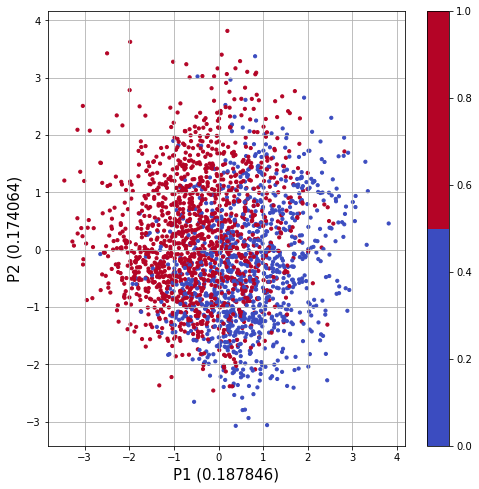

In [11]:
features = [name for name in agg_game_drive if name != 'home_win']
df_pca(agg_game_drive, features, 'home_win', title='Field Position, Penalty Yards, and Turnovers')

# PCA on all features

With all features plotted we see that the divergence of win/loss is not well-explained by this dataset, as expected. There are many
features that have nothing to do with a win such as day of week, week of season, year of season.

The P1 and P2 explanation ratios are quite low, both being less than 20%. This indicates that much of the data is irrelevant, as expected.

(2381, 3)
(2381, 2)


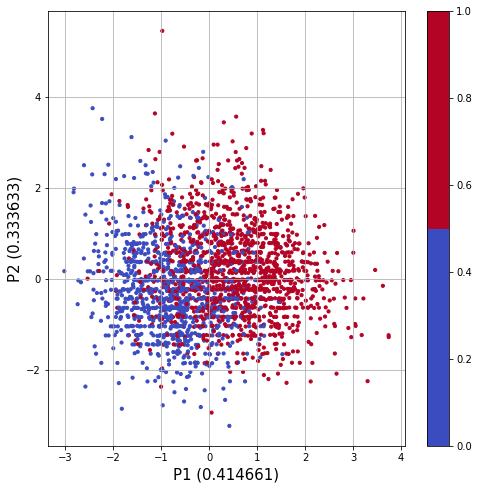

In [12]:
df_pca(agg_game_drive, ['start_field', 'penalty_yards', 'turnover_differential'], 'home_win', title='Field Position and Turnovers')

# Removing the obvious

After removing season year, week, and day of week we see that the data much better explains a win or loss. The P1 and P2 explanation ratios are much higher with just these three features explaining 74% of the variance in data.

(73, 3)
(73, 2)


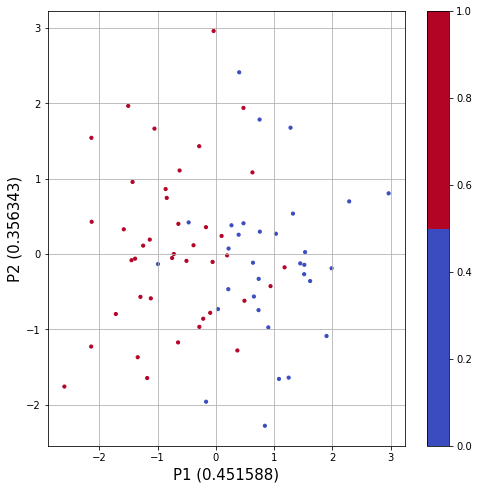

In [13]:
df_pca(agg_game_drive.query("home_team == 'SD'"), ['start_field', 'penalty_yards', 'turnover_differential'], 'home_win', title='New England Field Position and Turnovers')

# The Case of San Diego

Over the last decade, the chargers have been a medicore team in terms of win/loss record. In this case, the PCA shows that the three main features we have identified show a greater separation. This is because with the teams at the top and at the bottom, they win or lose despite the stats. A team like the New England Patriots will find a way to win a lost game. A team like San Diego is not of the same quality. If the stats are against them, then they lose. If the stats are with them, then they win. 

In [14]:
df = pd.read_csv(os.path.join('.', 'data', 'top_qbs_passing_tds.csv'))
df['heightweight'] = df.height / df.weight
df.head()

,min,first_name,last_name,height,weight,years_pro,college,position,passing_tds,heightweight
0,00-0020531,Drew,Brees,72,209,16,Purdue,QB,295,0.344498
1,00-0019596,Tom,Brady,76,225,17,Michigan,QB,279,0.337778
2,00-0023459,Aaron,Rodgers,74,225,12,California,QB,274,0.328889
3,00-0010346,Peyton,Manning,77,230,18,Tennessee,UNK,235,0.334783
4,00-0022942,Philip,Rivers,77,228,13,North Carolina State,QB,217,0.337719


In [15]:
features = ['heightweight', 'years_pro']
x = df.loc[:, features]

In [16]:
y = df.loc[:, 'passing_tds']

In [17]:
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x, columns=features)
x.head()

,heightweight,years_pro
0,1.018202,1.463324
1,0.430715,1.689146
2,-0.346404,0.560038
3,0.168860,1.914968
4,0.425603,0.785859


In [18]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-0.314749,1.754704
1,-0.889845,1.498968
2,-0.640951,0.151062
3,-1.234685,1.473489
4,-0.254740,0.856633


In [19]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,passing_tds
0,-0.314749,1.754704,295
1,-0.889845,1.498968,279
2,-0.640951,0.151062,274
3,-1.234685,1.473489,235
4,-0.254740,0.856633,217


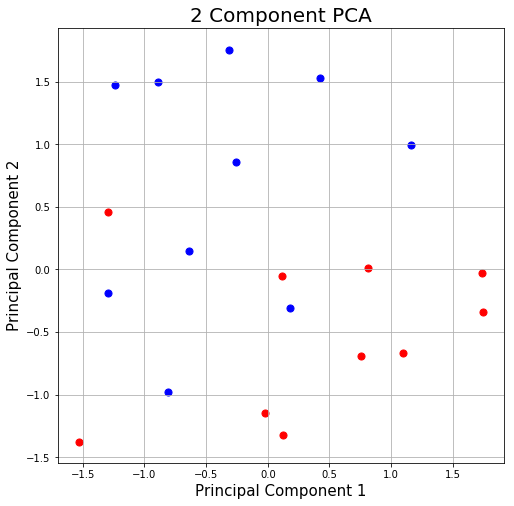

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


bottom = finalDf.loc[:, 'passing_tds'].quantile(0.2)
top = finalDf.loc[:, 'passing_tds'].quantile(0.8)

bottomDf = finalDf.loc[finalDf.passing_tds <= bottom]
midDf = finalDf.loc[(finalDf.passing_tds > bottom) & (finalDf.passing_tds <= top)]
topDf = finalDf.loc[finalDf.passing_tds > top]

ax.scatter(bottomDf.loc[:, 'principal component 1']
               , bottomDf.loc[:, 'principal component 2']
               , c = 'r'
               , s = 50)
ax.scatter(topDf.loc[:, 'principal component 1']
               , topDf.loc[:, 'principal component 2']
               , c = 'b'
               , s = 50)
ax.grid()

explained variance ratio (first two components): [0.92461621 0.05301557]


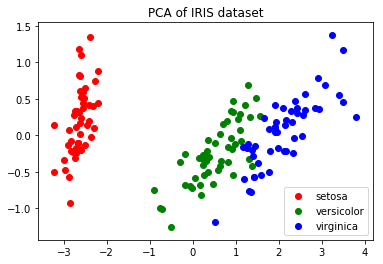

In [21]:
from sklearn import datasets
import pylab as pl
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components):', pca.explained_variance_ratio_)

pl.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    pl.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
pl.legend()
pl.title('PCA of IRIS dataset')

pl.show()

In [22]:

dir(X_r)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_e